In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn import decomposition
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

In [4]:
xTrain = pd.read_csv('q4xTrain.csv')
xTest = pd.read_csv('q4xTest.csv')
yTrain = pd.read_csv('q4yTrain.csv')
yTest = pd.read_csv('q4yTest.csv')

In [12]:
print(xTrain.shape, yTrain.shape)

(1119, 11) (1119, 1)


In [52]:
def normalize(x):
    scaler = StandardScaler()
    x_n = scaler.fit_transform(x)
    return x_n

In [53]:
xTrain_n = normalize(xTrain)
xTest_n = normalize(xTest)
xTrain_n

array([[-0.58058016,  1.2132177 , -0.96751673, ..., -0.4717514 ,
        -0.91399393, -0.59556747],
       [-0.18291626,  1.04253031, -1.37660467, ...,  0.81578474,
        -0.74098702, -0.87716184],
       [-0.18291626, -0.15228142,  0.61769902, ...,  0.75140793,
        -0.22196627,  0.24921563],
       ...,
       [ 0.72602981,  1.38390509, -0.76297277, ..., -0.08549056,
        -0.10662833, -0.03237874],
       [-0.80781668,  0.44512444, -0.76297277, ...,  0.88016155,
        -0.79865599, -0.97102663],
       [-0.97824406,  2.09510255, -1.1720607 , ...,  1.39517601,
        -0.45264216,  0.34308042]])

In [54]:
pca = decomposition.PCA(n_components=3)
pca.fit(xTrain_n)

PCA(n_components=3)

In [55]:
scores = pca.transform(xTrain_n)

In [56]:
scores_df = pd.DataFrame(scores, columns=['PC1','PC2','PC3'])
scores_df

,PC1,PC2,PC3
0,-1.235189,0.228541,-1.400542
1,-1.270466,0.515590,-1.796414
2,0.195015,-0.183420,-0.139665
3,1.270943,0.227402,0.063124
4,3.361472,0.819339,1.020138
...,...,...,...
1114,2.962386,-1.463312,-0.436080
1115,1.958560,-2.417231,1.654317
1116,0.035402,1.911708,-0.324304
1117,-0.081038,4.157959,0.572876


In [57]:
xTrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.74,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8
1,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.99760,3.44,0.53,9.5
2,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7
3,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5
4,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5


In [13]:
df_3 = pd.concat([scores_df, yTrain], axis=1)
df_3.head()

,PC1,PC2,PC3,label
0,-1.235189,0.228541,-1.400542,0
1,-1.270466,0.515590,-1.796414,0
2,0.195015,-0.183420,-0.139665,0
3,1.270943,0.227402,0.063124,1
4,3.361472,0.819339,1.020138,0


In [17]:
pca.fit_transform(xTrain)
pca.explained_variance_ratio_.cumsum()

array([0.94351893, 0.99466045, 0.99746654])

In [58]:
xTrain_pca = pd.DataFrame(pca.fit_transform(xTrain_n))
xTest_pca = pd.DataFrame(pca.fit_transform(xTest_n))
xTest_pca

,0,1,2
0,-1.540682,-0.040331,-1.374650
1,0.925353,-2.403228,1.203636
2,-1.070378,-0.925768,-1.508579
3,-1.170692,-0.124942,-0.092651
4,-1.229281,-0.407067,-0.172532
...,...,...,...
475,-2.368600,-0.196826,-0.802816
476,-2.412784,-0.931481,-0.471001
477,-1.712124,0.037959,-3.241705
478,2.004261,-0.874179,0.039223


In [22]:
pca.explained_variance_ratio_

array([0.94351893, 0.05114151, 0.00280609])

In [29]:
df_components = pd.DataFrame(abs(pca.components_))
df_components

,0,1,2,3,4,5,6,7,8,9,10
0,0.005956,0.000323,0.000149,0.005858,0.000059,0.219982,0.975442,0.000004,0.000284,0.000308,0.007158
1,0.025812,0.002367,0.002788,0.011966,0.000473,0.974832,0.219906,0.000036,0.003743,0.000770,0.022495
2,0.961159,0.024939,0.074582,0.253476,0.002799,0.023312,0.001219,0.000770,0.057841,0.019073,0.038426


In [28]:
features = []
for col in xTrain.columns:
    features.append(col)
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [30]:
df_components = df_components.set_axis(features, axis=1, inplace=False)
df_components

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.005956,0.000323,0.000149,0.005858,0.000059,0.219982,0.975442,0.000004,0.000284,0.000308,0.007158
1,0.025812,0.002367,0.002788,0.011966,0.000473,0.974832,0.219906,0.000036,0.003743,0.000770,0.022495
2,0.961159,0.024939,0.074582,0.253476,0.002799,0.023312,0.001219,0.000770,0.057841,0.019073,0.038426


In [76]:
import heapq
df_list = df_components.values.tolist()
com = 1
features = list(df_components.columns.values)
for n in df_list:
    print('Three most important features and probability in ' + str(com) + ' principal component are:')
    print(heapq.nlargest(3, zip(n, features)))
    com += 1

Three most important features and probability in 1 principal component are:
[(0.9754418335239645, 'total sulfur dioxide'), (0.21998158955370026, 'free sulfur dioxide'), (0.007157635636110675, 'alcohol')]
Three most important features and probability in 2 principal component are:
[(0.974832020969403, 'free sulfur dioxide'), (0.21990638887855338, 'total sulfur dioxide'), (0.02581244831359386, 'fixed acidity')]
Three most important features and probability in 3 principal component are:
[(0.9611587008373828, 'fixed acidity'), (0.2534761790494482, 'residual sugar'), (0.07458219701518772, 'citric acid')]


In [34]:
pca3 = decomposition.PCA(0.95)
pca3.fit(xTrain)

PCA(n_components=0.95)

In [35]:
scores = pca3.transform(xTrain_n)
df_95 = pd.DataFrame(scores)
df_95

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


,0,1
0,-48.801097,-5.776500
1,-49.113898,-5.607851
2,-48.732587,-5.573377
3,-48.733307,-5.758934
4,-47.542603,-4.033059
...,...,...
1114,-49.551716,-6.055804
1115,-49.732592,-5.944868
1116,-47.491051,-4.092500
1117,-46.952772,-3.115293


In [18]:
pca1 = decomposition.PCA(n_components=1)
pca2 = decomposition.PCA(n_components=2)

In [20]:
pca1.fit_transform(xTrain)
pca1.explained_variance_ratio_.cumsum()

array([0.94351893])

In [21]:
pca2.fit_transform(xTrain)
pca2.explained_variance_ratio_.cumsum()

array([0.94351893, 0.99466045])

In [38]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

#Train the logistic regression model
lg.fit(xTrain_pca, yTrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
xTest_pca

,0,1,2
0,-24.553398,-1.795480,-1.388437
1,-22.090723,-4.469196,1.364542
2,-29.772067,-6.805592,-0.913229
3,-9.584958,1.022916,-1.067254
4,-10.671345,-3.855942,-1.417581
...,...,...,...
475,-20.328753,3.421806,-2.485572
476,-31.826188,-2.232056,-1.568187
477,-40.286891,-3.441235,-0.679026
478,-9.405506,1.916240,2.032573


In [46]:
y_pred = lg.predict(xTest_pca)

ValueError: X has 3 features, but LogisticRegression is expecting 2 features as input.

In [50]:
def train_predict(xTrain, yTrain, xTest):
    """
    Train an unregularized logistic regression model on the training dataset
    and predict the probabilities on the test data.
    """
    lg = LogisticRegression()
    lg.fit(xTrain, yTrain)
    yPred = lg.predict_proba(xTest)
    yPred = yPred[:, 1]
    return yPred

In [61]:
yPred_pca = train_predict(xTrain_pca, yTrain, xTest_pca)
yPred_n = train_predict(xTrain_n, yTrain, xTest_n)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
fpr_n, tpr_n, _ = roc_curve(yTest, yPred_n)
fpr_pca, tpr_pca, _ = roc_curve(yTest, yPred_pca)

In [65]:
import matplotlib.pyplot as plt

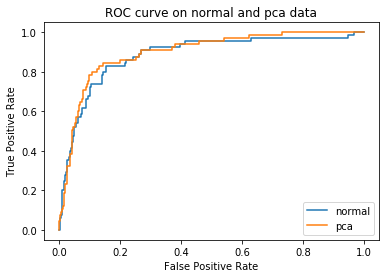

In [70]:
plt.plot(fpr_n,tpr_n,label="normal")
plt.plot(fpr_pca,tpr_pca,label="pca")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve on normal and pca data')
plt.legend(loc="lower right")
plt.savefig("roc.png")
plt.show()